<a href="https://colab.research.google.com/github/rameshavinash94/Alternus-Vera/blob/main/Avinash_Ramesh_NLP_AlternusVera_Intent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **User Intent - Intention based ML/ Deep learning approach for fake news detection**

*The Deep Learning Approach has been used in the majority of studies to detect & combat fake news. These articles, however, fail to capture the **deceptive intentions behind fake news**. Here, We used a novel approach to tackle and combat fake news in this case.*

**Articles:**

https://aisel.aisnet.org/icis2021/data_analytics/data_analytics/4/ 

https://research.signal-ai.com/assets/Deception_Detection_with_NLP.pdf

**Type Of Liars**

![](https://www.nirandfar.com/wp-content/uploads/2021/02/types-of-liars.png)

**Deceitful liars: Those who lie to others about facts**

*Lying to others about facts is prototypical lying. We’ve all done it. Children learn to lie around age three, and researchers believe it’s part of normal human brain development. Lying requires learning to see things from other people’s perspectives, developing what psychologists call “theory of mind.” Learning to tell an effective lie means getting into the other person’s head in order to tell them what they want to hear.*

**Fake News can be both Deceptive and Non Deceptive**

<img src="https://github.com/rameshavinash94/AlternusVera/blob/main/Screen%20Shot%202022-04-25%20at%2010.56.44%20AM.png?raw=true" width=200>

*Fake news can be both deceptive and nondeceptive.*
 
**Both deceptive and non-deceptive fake news share something in common.**

***Lot's of Earlier Approaches have not be able to capture deceptive intentions behind fake news.***

**Finding Deceptive Intention**

***People in psychology research has focused on the use of verbal cues to detect deceptive behavior. Among the various factors, we have considered a few here.***

**Micro Factors:**

**Cognitive complexity**
Liars construct stories without any direct experience. hence suffer congnitive overload.

- **Cognitive Overload**
In writings, words, sentences, paragraphs length, unique word ratio, time indicator etc.

**Verbal Immediacy:** No direct Experience -> low level of immediacy ( degree to which one associates himself/herself within the story)
In writing 1st person singular pronoun, 3rd person singular pronoun, past tense, verb, etc.
 
**Emotional Experience:**
Feeling guilty about lying, negative emotions(in an online setting, opposite results)
In writings, friendliness, sentiment, hatred, enjoyment, etc.
 


**Approach**



<img src="https://github.com/rameshavinash94/AlternusVera/blob/main/Screen%20Shot%202022-04-25%20at%2011.03.20%20AM.png?raw=true" width=300>

**Architecure Diagram**

![](https://github.com/rameshavinash94/AlternusVera/blob/main/Deceptive_Intention.png?raw=true)

**SUPERVISED MODEL STEP 1: FINDING DECEPTIVE INTENTIONS CUES**

Then Use the trained model to **Convert Fake News in Politifact dataset into Deceptive/Non Deceptive intentions.**

So New Dataset would be finally classfied be divided into 3 classificaitons and passed to Model for prediciton: 



1.   _Real or True_
2. _Fake with Deceptions_
3. _Fake without Deceptions_

*Use the famous Review dataset since it contains deceptive and non deceptive classifications*

In [ ]:
! pip install datasets
! pip install transformers
! pip install spacy --upgrade
! python -m spacy download en_core_web_md
! python -m spacy download en_core_web_sm
! pip install swifter
! pip install spacy-universal-sentence-encoder

**KINDLY RESTART RUNTIME AFTER INSTALLATION AND RUN BELOW**

**ADD GPU AND CHECK**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**IMPORTING LIBRARIES**

In [ ]:
from datasets import list_datasets, load_dataset
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
import spacy
from transformers import pipeline
from numba import jit
import warnings
import swifter
import spacy_universal_sentence_encoder

**SUPRESS WARNINGS**

In [ ]:
#just to supress warnings
warnings.filterwarnings("ignore")

## **START DATA LOADING/PROCESSING**

In [ ]:
#load the deception and non decetive hotel dataset for analysis
dataset= pd.read_csv('https://raw.githubusercontent.com/rameshavinash94/AlternusVera/main/deceptive-opinion.csv')

In [ ]:
dataset.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


In [ ]:
dataset [(dataset['deceptive']=='deceptive') & (dataset['polarity']=='positive')] 

,deceptive,hotel,polarity,source,text
400,deceptive,fairmont,positive,MTurk,My husband and I visited the Fairmont Chicago ...
401,deceptive,conrad,positive,MTurk,My wife and I booked a Deluxe Accessible Room ...
402,deceptive,hyatt,positive,MTurk,Quite simply the Hyatt Regency Chicago is the ...
403,deceptive,conrad,positive,MTurk,Conrad Chicago it was 5:00 AM my plan just fle...
404,deceptive,hyatt,positive,MTurk,My girlfriends and I stayed at the Hyatt in Ch...
...,...,...,...,...,...
795,deceptive,intercontinental,positive,MTurk,The InterContinental Chicago Hotel is one of t...
796,deceptive,amalfi,positive,MTurk,My wife and me stayed in the Amalfi Hotel Chic...
797,deceptive,intercontinental,positive,MTurk,"Last month, my husband and I stayed at the Int..."
798,deceptive,palmer,positive,MTurk,Amazing! I was swept away when I walked into t...


In [ ]:
dataset['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

In [ ]:
dataset['source'].unique()

array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

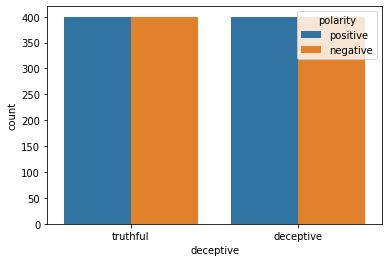

In [ ]:
sns.countplot(x=dataset['deceptive'],hue='polarity',data=dataset)

In [ ]:
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [ ]:
start_time= time.time()
dataset['cleaned_text']=dataset['text'].apply(text_cleaning)
end_time=time.time()
print(end_time - start_time)

0.4529573917388916


In [ ]:
#view sample text
dataset['cleaned_text'][0]

'we stayed for a one night getaway with family on a thursday  triple aaa rate of  was a steal   floor room complete with  plasma tv bose stereo  voss and evian water  and gorgeous bathroom no tub but was fine for us  concierge was very helpful  you cannot beat this location    only flaw was breakfast was pricey and service was very very slow  for four kids and four adults on a friday morning  even though there were only two other tables in the restaurant  food was very good so it was worth the wait  i would return in a heartbeat  a gem in chicago     '

## **cognitive_complexisty**

*The cognitive complexity of texts in natural languages is a fundamental measure of the properties of syntax and semantics in textual comprehension, processing, and search*

*Here, For now, I'm considering*

1.   **LENGTH FACTOR**
2.   **UNIQUE FACTOR**

In [ ]:
def cognitive_complexisty(text):
  words=[x for x in text.split(' ')]
  char_count_per_word= [len(x) for x in text.split(' ')]
  Average_character_per_word=sum(char_count_per_word)/len(char_count_per_word)
  unique_word_ratio = len(set(words))/len(words)
  return (Average_character_per_word,unique_word_ratio)

In [ ]:
text='we stayed for a one night getaway with family on a thursday  triple aaa rate of  was a steal   floor room complete with  plasma tv bose stereo  voss and evian water  and gorgeous bathroom no tub but was fine for us  concierge was very helpful  you cannot beat this location    only flaw was breakfast was pricey and service was very very slow  for four kids and four adults on a friday morning  even though there were only two other tables in the restaurant  food was very good so it was worth the wait  i would return in a heartbeat  a gem in chicago     '
cognitive_complexisty(text)

(3.456, 0.616)

In [ ]:
start_time= time.time()
dataset['cognitive_complexisty']=dataset['cleaned_text'].apply(cognitive_complexisty)
end_time=time.time()
print(end_time - start_time)

0.1776278018951416


In [ ]:
Average_character_per_word,unique_word_ratio = zip(*dataset['cognitive_complexisty'].values)

In [ ]:
dataset['Average_character_per_word']=Average_character_per_word
dataset['unique_word_ratio'] = unique_word_ratio

In [ ]:
dataset

,deceptive,hotel,polarity,source,text,cleaned_text,cognitive_complexisty,Average_character_per_word,unique_word_ratio
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,we stayed for a one night getaway with family ...,"(3.456, 0.616)",3.456000,0.616000
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,triple a rate with upgrade to view room was le...,"(3.896551724137931, 0.6551724137931034)",3.896552,0.655172
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,this comes a little late as i m finally catchi...,"(3.632911392405063, 0.569620253164557)",3.632911,0.569620
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,the omni chicago really delivers on all fronts...,"(3.835616438356164, 0.5821917808219178)",3.835616,0.582192
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,i asked for a high floor away from the elevato...,"(3.753086419753086, 0.7037037037037037)",3.753086,0.703704
...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,problems started when i booked the intercontin...,"(3.745222929936306, 0.6178343949044586)",3.745223,0.617834
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,the amalfi hotel has a beautiful website and i...,"(3.8, 0.6214285714285714)",3.800000,0.621429
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,the intercontinental chicago magnificent mile ...,"(4.079470198675497, 0.6291390728476821)",4.079470,0.629139
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...",the palmer house hilton while it looks good i...,"(3.3592233009708736, 0.6601941747572816)",3.359223,0.660194


## **Verbal immediacy**

![](https://study.com/cimages/videopreview/videopreview-full/immediacy-in-communication-definition-lesson-quiz_113264.jpg)

My Considerations


1.   **1'st person Singular pronouns**
2.   **3rd person Pronouns**
3.   **Past tense verbs**



In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def findPronoun_Verb(text):
    PRON_first_person = 0
    PRON_third_person = 0
    pron_count=0
    past_tens_verb_count=0
    verb_count=0
    doc = nlp(text)
    for token in doc:
          if token.pos_=='PRON':
            pron_count+=1
            if token.morph.get("Person") == ["1"] and token.morph.get("Number") == ['Sing']:
              PRON_first_person+=1
            if token.morph.get("Number")==["3"]:
              PRON_third_person+=1
          if token.pos_=='VERB':
            verb_count+=1
            if token.morph.get("Tense")==['Past']:
              past_tens_verb_count+=1

    ratio_of_past_tense_verb = past_tens_verb_count/verb_count if verb_count else 0
    ratio_of_PRON_first_person = PRON_first_person/pron_count if pron_count else 0
    ratio_of_PRON_third_person = PRON_third_person/pron_count if pron_count else 0
    return ratio_of_PRON_first_person,ratio_of_PRON_third_person,ratio_of_past_tense_verb

In [ ]:
start_time= time.time()
dataset['Verbal_immediacy']=dataset['cleaned_text'].apply(findPronoun_Verb)
end_time=time.time()
print(end_time - start_time)

43.83180546760559


In [ ]:
ratio_of_past_tense_verb, ratio_of_PRON_first_person,ratio_of_PRON_third_person = zip(*dataset['Verbal_immediacy'].values)

In [ ]:
dataset['ratio_of_past_tense_verb'] = ratio_of_past_tense_verb
dataset['ratio_of_PRON_first_person'] = ratio_of_PRON_first_person
dataset['ratio_of_PRON_third_person'] = ratio_of_PRON_third_person

In [ ]:
dataset

,deceptive,hotel,polarity,source,text,cleaned_text,cognitive_complexisty,Average_character_per_word,unique_word_ratio,Verbal_immediacy,ratio_of_past_tense_verb,ratio_of_PRON_first_person,ratio_of_PRON_third_person
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,we stayed for a one night getaway with family ...,"(3.456, 0.616)",3.456000,0.616000,"(0.16666666666666666, 0.0, 0.4)",0.166667,0.0,0.400000
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,triple a rate with upgrade to view room was le...,"(3.896551724137931, 0.6551724137931034)",3.896552,0.655172,"(0.0, 0.0, 0.6666666666666666)",0.000000,0.0,0.666667
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,this comes a little late as i m finally catchi...,"(3.632911392405063, 0.569620253164557)",3.632911,0.569620,"(0.2631578947368421, 0.0, 0.35)",0.263158,0.0,0.350000
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,the omni chicago really delivers on all fronts...,"(3.835616438356164, 0.5821917808219178)",3.835616,0.582192,"(0.5, 0.0, 0.2727272727272727)",0.500000,0.0,0.272727
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,i asked for a high floor away from the elevato...,"(3.753086419753086, 0.7037037037037037)",3.753086,0.703704,"(0.45454545454545453, 0.0, 0.8333333333333334)",0.454545,0.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,problems started when i booked the intercontin...,"(3.745222929936306, 0.6178343949044586)",3.745223,0.617834,"(1.0, 0.0, 0.625)",1.000000,0.0,0.625000
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,the amalfi hotel has a beautiful website and i...,"(3.8, 0.6214285714285714)",3.800000,0.621429,"(0.3125, 0.0, 0.5)",0.312500,0.0,0.500000
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,the intercontinental chicago magnificent mile ...,"(4.079470198675497, 0.6291390728476821)",4.079470,0.629139,"(0.3333333333333333, 0.0, 0.35714285714285715)",0.333333,0.0,0.357143
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...",the palmer house hilton while it looks good i...,"(3.3592233009708736, 0.6601941747572816)",3.359223,0.660194,"(0.38461538461538464, 0.0, 0.5833333333333334)",0.384615,0.0,0.583333


## **Emotional Experience**

*I'm considering the below factors to identify index of all emotions in text.*

anger 🤬 

disgust 🤢

fear 😨

joy 😀

neutral 😐

sadness 😭

surprise 😲

![](https://www.meaningcloud.com/wp-content/uploads/2020/01/emotions.png)

***Going to Use Pretrained NLP model for the finding Emotions scores***

***here I have Emotion text classifier based on the distilroberta-base.***

In [ ]:
#loading the classifier model - emotion-english-distilroberta-base
with tf.device('/device:GPU:0'):
  classifier1 = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True, truncation='only_first')

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
st=time.time()
text='we stayed for a one night getaway with family on a thursday  triple aaa rate of  was a steal   floor room complete with  plasma tv bose stereo  voss and evian water  and gorgeous bathroom no tub but was fine for us  concierge was very helpful  you cannot beat this location    only flaw was breakfast was pricey and service was very very slow  for four kids and four adults on a friday morning  even though there were only two other tables in the restaurant  food was very good so it was worth the wait  i would return in a heartbeat  a gem in chicago     '
end=time.time()
classifier1(text)

[[{'label': 'anger', 'score': 0.007668978068977594},
  {'label': 'disgust', 'score': 0.0005801880615763366},
  {'label': 'fear', 'score': 0.007861597463488579},
  {'label': 'joy', 'score': 0.8475580215454102},
  {'label': 'neutral', 'score': 0.021656276658177376},
  {'label': 'sadness', 'score': 0.056506600230932236},
  {'label': 'surprise', 'score': 0.058168262243270874}]]

In [ ]:
print(end-st)

2.9802322387695312e-05


In [ ]:
@jit
def test(x):
  return classifier1(x)

with tf.device('/device:GPU:0'):
  st=time.time()
  emotion = dataset['cleaned_text'].swifter.apply(test)
  end=time.time()
  print(end-st)

Pandas Apply:   0%|          | 0/1600 [00:00<?, ?it/s]

476.28940320014954


In [ ]:
anger=[]
disgust=[]
fear=[]
joy=[]
neutral=[]
sadness=[]
surprise=[]
for x in range(len(emotion)):
  anger.append(emotion[x][0][0]['score'])
  disgust.append(emotion[x][0][1]['score'])
  fear.append(emotion[x][0][2]['score'])
  joy.append(emotion[x][0][3]['score'])
  neutral.append(emotion[x][0][4]['score'])
  sadness.append(emotion[x][0][5]['score'])
  surprise.append(emotion[x][0][6]['score'])

In [ ]:
emotions_scores_df = pd.DataFrame(data=[anger,disgust,fear,joy,neutral,sadness,surprise]).T.rename(columns={0:'anger',1:'disgust',2:'fear',3:'joy',4:'neutral',5:'sadness',6:'surprise'})

In [ ]:
emotions_scores_df.to_csv('emotions.csv')

**Now, Going to Use all These Features and Perform Classification of Decetive and Non Deceptive Text**

## **COMBINE ALL MICRO FACTORS TO ONE DF**

**Combining all Micro Factors Features to final Dataframe and check Performance**

In [ ]:
final_dataset = pd.merge(dataset,emotions_scores_df,left_index=True,right_index=True)

In [ ]:
final_dataset

,deceptive,hotel,polarity,source,text,cleaned_text,cognitive_complexisty,Average_character_per_word,unique_word_ratio,Verbal_immediacy,ratio_of_past_tense_verb,ratio_of_PRON_first_person,ratio_of_PRON_third_person,anger,disgust,fear,joy,neutral,sadness,surprise
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,we stayed for a one night getaway with family ...,"(3.456, 0.616)",3.456000,0.616000,"(0.16666666666666666, 0.0, 0.4)",0.166667,0.0,0.400000,0.007669,0.000580,0.007862,0.847558,0.021656,0.056507,0.058168
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,triple a rate with upgrade to view room was le...,"(3.896551724137931, 0.6551724137931034)",3.896552,0.655172,"(0.0, 0.0, 0.6666666666666666)",0.000000,0.0,0.666667,0.008000,0.001221,0.026734,0.914369,0.012728,0.012108,0.024841
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,this comes a little late as i m finally catchi...,"(3.632911392405063, 0.569620253164557)",3.632911,0.569620,"(0.2631578947368421, 0.0, 0.35)",0.263158,0.0,0.350000,0.003056,0.000331,0.002878,0.880191,0.028755,0.031163,0.053625
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,the omni chicago really delivers on all fronts...,"(3.835616438356164, 0.5821917808219178)",3.835616,0.582192,"(0.5, 0.0, 0.2727272727272727)",0.500000,0.0,0.272727,0.008911,0.001160,0.016864,0.845108,0.027914,0.065899,0.034144
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,i asked for a high floor away from the elevato...,"(3.753086419753086, 0.7037037037037037)",3.753086,0.703704,"(0.45454545454545453, 0.0, 0.8333333333333334)",0.454545,0.0,0.833333,0.001852,0.000427,0.000905,0.988541,0.002206,0.001599,0.004470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...,problems started when i booked the intercontin...,"(3.745222929936306, 0.6178343949044586)",3.745223,0.617834,"(1.0, 0.0, 0.625)",1.000000,0.0,0.625000,0.016741,0.001085,0.049987,0.039196,0.016673,0.137807,0.738511
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...,the amalfi hotel has a beautiful website and i...,"(3.8, 0.6214285714285714)",3.800000,0.621429,"(0.3125, 0.0, 0.5)",0.312500,0.0,0.500000,0.001140,0.000473,0.971820,0.010127,0.000769,0.013618,0.002053
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...,the intercontinental chicago magnificent mile ...,"(4.079470198675497, 0.6291390728476821)",4.079470,0.629139,"(0.3333333333333333, 0.0, 0.35714285714285715)",0.333333,0.0,0.357143,0.184191,0.030366,0.058372,0.216477,0.029712,0.433471,0.047411
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i...",the palmer house hilton while it looks good i...,"(3.3592233009708736, 0.6601941747572816)",3.359223,0.660194,"(0.38461538461538464, 0.0, 0.5833333333333334)",0.384615,0.0,0.583333,0.116081,0.012556,0.080669,0.210837,0.027535,0.470895,0.081427


In [ ]:
final_dataset.to_csv('final.csv')

In [ ]:
final_cleaned = final_dataset.drop(columns=['text','cognitive_complexisty','Verbal_immediacy'])

In [ ]:
#perfrom lemmatizationa and stop word removal
final_cleaned['lemma_text'] = final_cleaned.cleaned_text.swifter.apply(lambda text: " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))

Pandas Apply:   0%|          | 0/1600 [00:00<?, ?it/s]

***CREATE SENTECE EMBEDDING USING GOOGLE'S UNIVERSAL SENTENCE ENCODER***

In [ ]:
medium_nlp = spacy_universal_sentence_encoder.load_model('en_use_md')

Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB



In [ ]:
final_cleaned['word_vectors']=final_cleaned['lemma_text'].swifter.apply(lambda x : list(medium_nlp(x).vector))

Pandas Apply:   0%|          | 0/1600 [00:00<?, ?it/s]

In [ ]:
required_fields = final_cleaned.loc[:,['word_vectors','ratio_of_past_tense_verb','ratio_of_PRON_first_person','ratio_of_PRON_third_person','Average_character_per_word','unique_word_ratio','anger','disgust','fear','joy','neutral','sadness','surprise','deceptive']]

In [ ]:
required_fields

,word_vectors,ratio_of_past_tense_verb,ratio_of_PRON_first_person,ratio_of_PRON_third_person,Average_character_per_word,unique_word_ratio,anger,disgust,fear,joy,neutral,sadness,surprise,deceptive
0,"[-0.06213694, -0.064161144, -0.050492458, -0.0...",0.166667,0.0,0.400000,3.456000,0.616000,0.007669,0.000580,0.007862,0.847558,0.021656,0.056507,0.058168,truthful
1,"[0.048308287, -0.06994144, -0.059688766, -0.05...",0.000000,0.0,0.666667,3.896552,0.655172,0.008000,0.001221,0.026734,0.914369,0.012728,0.012108,0.024841,truthful
2,"[-0.061969124, -0.059160154, -0.03691029, -0.0...",0.263158,0.0,0.350000,3.632911,0.569620,0.003056,0.000331,0.002878,0.880191,0.028755,0.031163,0.053625,truthful
3,"[-0.06282524, -0.063672304, -0.018203769, 0.00...",0.500000,0.0,0.272727,3.835616,0.582192,0.008911,0.001160,0.016864,0.845108,0.027914,0.065899,0.034144,truthful
4,"[-0.06573058, -0.06623197, -0.072515056, -0.00...",0.454545,0.0,0.833333,3.753086,0.703704,0.001852,0.000427,0.000905,0.988541,0.002206,0.001599,0.004470,truthful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"[-0.06563105, -0.06682055, -0.028660944, 0.037...",1.000000,0.0,0.625000,3.745223,0.617834,0.016741,0.001085,0.049987,0.039196,0.016673,0.137807,0.738511,deceptive
1596,"[-0.06639337, -0.007910852, -0.05210531, -0.06...",0.312500,0.0,0.500000,3.800000,0.621429,0.001140,0.000473,0.971820,0.010127,0.000769,0.013618,0.002053,deceptive
1597,"[-0.057863787, -0.0659935, -0.05059391, -0.051...",0.333333,0.0,0.357143,4.079470,0.629139,0.184191,0.030366,0.058372,0.216477,0.029712,0.433471,0.047411,deceptive
1598,"[-0.05848577, 0.033657342, -0.052341815, -0.05...",0.384615,0.0,0.583333,3.359223,0.660194,0.116081,0.012556,0.080669,0.210837,0.027535,0.470895,0.081427,deceptive


In [ ]:
X=required_fields.iloc[:,1:-1]
y=required_fields.iloc[:,-1].map({'truthful':0,'deceptive':1})

In [ ]:
Only_word_vector_target = required_fields.loc[:,['word_vectors','deceptive']]

In [ ]:
X_word_vector = list(Only_word_vector_target['word_vectors'])
y_target = list(y)

### **SIMPLE LOGISTIC REGRESSION USING ONLY SENTECE ENCODER(SEMANTIC CUES)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_word_vector,y_target,random_state=0,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=100)
clf1.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
predictions = clf1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)

In [ ]:
score

0.771875

### **NOW TRYING OUT ALL OF THE MICRO FACTORS(DECEPTIVE CUES) AND PREDICT ACCURACY**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=100)
clf2.fit(X_train, y_train)

LogisticRegression(C=100)

In [ ]:
predictions = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)

In [ ]:
score

0.721875

### **MULLER LOOP ON DECEPTIVE CUES**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 67.19, Training time = 0.02 seconds
Classifier = Decision Tree, Score (test, accuracy) = 60.31, Training time = 0.02 seconds
Classifier = Random Forest, Score (test, accuracy) = 63.12, Training time = 0.05 seconds
Classifier = AdaBoost, Score (test, accuracy) = 65.31, Training time = 0.18 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 64.06, Training time = 0.00 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 67.19


### **MULLER LOOP ON SEMANTIC CUES**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_word_vector,y_target,random_state=0,test_size=0.2)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 72.19, Training time = 0.10 seconds
Classifier = Decision Tree, Score (test, accuracy) = 65.00, Training time = 0.61 seconds
Classifier = Random Forest, Score (test, accuracy) = 66.88, Training time = 0.06 seconds
Classifier = AdaBoost, Score (test, accuracy) = 71.88, Training time = 3.76 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 74.06, Training time = 0.05 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Naive Bayes, Score (test, accuracy) = 74.06


### **COMBINING DECEPTIVE CUES with SEMANTIC CUES and run Deep Learning Model**